In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
import os
import sys
sys.path.append("../../src")
from Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot

2023-02-09 12:55:53.859823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 12:55:53.992493: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-09 12:55:55.053554: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/bwhpc/common/devel/cuda/11.8/lib64
2023-02-09 12:55:55.053638: W tensorflow/compil

In [2]:
path_reports = "../../results/without_augmentation"

In [3]:
path_train_individual_models = os.path.join(path_reports, 'train__MLP_FCN_Resnet_MCDCNN_Encoder_Time_CNN_11_datasets.csv')

In [4]:
path_train_encoder10 = os.path.join(path_reports, 'test_Encoder10.csv')
path_train_fcn10 = os.path.join(path_reports, 'test_FCN10.csv')
path_train_mlp10 = os.path.join(path_reports, 'test_MLP10.csv')
path_train_nne10 = os.path.join(path_reports, 'test_NNE.csv')
path_train_resnet10 = os.path.join(path_reports, 'test_Resnet10.csv')

In [5]:
df_train_encoder10 = pd.read_csv(path_train_encoder10)
df_train_fcn10 =pd.read_csv(path_train_fcn10)
df_train_mlp10 =pd.read_csv(path_train_mlp10)
df_train_nne10 =pd.read_csv(path_train_nne10)
df_train_resnet10 = pd.read_csv(path_train_resnet10)
df_train_all_ensembles = pd.concat([df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_nne10, df_train_resnet10])

In [6]:
df_train_individual_models = pd.read_csv(path_train_individual_models)

In [7]:
df_train_individual_models_mean = df_train_individual_models\
                                        .groupby(['model_name',], as_index=False)\
                                        .mean()[['model_name', 'test_acc']]
df_train_individual_models_mean = df_train_individual_models_mean\
                                        .drop(df_train_individual_models_mean[\
                                                (df_train_individual_models_mean['model_name'] == 'MCDCNN') |\
                                                (df_train_individual_models_mean['model_name'] == 'Time_CNN')].index)
df_train_individual_models_mean["ensemble"] = False
df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]
df_train_all_ensembles_mean["ensemble"] = True
df_train_all_ensembles_mean = pd.concat([df_train_individual_models_mean, df_train_all_ensembles_mean], ignore_index=True)\
                                .sort_values(by=['test_acc'], ascending=False)\
                                .rename(columns={"test_acc": "avg_test_acc"})

/scratch/slurm_tmpdir/job_21748313/ipykernel_1312151/1779337110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_individual_models_mean = df_train_individual_models\
/scratch/slurm_tmpdir/job_21748313/ipykernel_1312151/1779337110.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]


In [8]:
df_train_individual_models_mean

,model_name,test_acc,ensemble
0,Encoder,0.830703,False
1,FCN,0.653679,False
3,MLP,0.793200,False
4,Resnet,0.718351,False


In [9]:
df_train_all_ensembles_mean

,model_name,avg_test_acc,ensemble
13,NNE-average,0.855973,True
14,NNE-logistic_average,0.855586,True
6,Encoder10-majority_vote,0.848126,True
4,Encoder10-average,0.840162,True
5,Encoder10-logistic_average,0.840151,True
0,Encoder,0.830703,False
15,NNE-majority_vote,0.824902,True
10,MLP10-average,0.820924,True
11,MLP10-logistic_average,0.820743,True
12,MLP10-majority_vote,0.820292,True


In [10]:
df_compare_encoder = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Encoder")].reset_index(drop=True)
df_compare_fcn = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("FCN")].reset_index(drop=True)
df_compare_resnet = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Resnet")].reset_index(drop=True)
df_compare_nne = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("NNE")].reset_index(drop=True)

In [11]:
df_compare_fcn

,model_name,avg_test_acc,ensemble
0,FCN,0.653679,False
1,FCN10-majority_vote,0.650781,True
2,FCN10-average,0.646385,True
3,FCN10-logistic_average,0.646251,True


In [12]:
def choose_model_and_best_ensemble(df):
    res = df[(df["model_name"] == df[df["ensemble"]].iloc[df['avg_test_acc'].idxmax()]['model_name']) |\
            (df["ensemble"] == False)]
    return res

In [13]:
df_best_ensemble_and_individual_model = choose_model_and_best_ensemble(df_compare_encoder)
for df in [df_compare_fcn, df_compare_resnet, df_compare_nne]:
    df_prepared = choose_model_and_best_ensemble(df)
    df_best_ensemble_and_individual_model = pd.concat([df_best_ensemble_and_individual_model, df_prepared], ignore_index=True)
df_best_ensemble_and_individual_model = df_best_ensemble_and_individual_model.sort_values(by=['avg_test_acc'], ascending=False)

# Visualise comparison of individual models with the best ensemble model

In [14]:
df_best_ensemble_and_individual_model

,model_name,avg_test_acc,ensemble
6,NNE-average,0.855973,True
0,Encoder10-majority_vote,0.848126,True
1,Encoder,0.830703,False
4,Resnet10-logistic_average,0.786273,True
5,Resnet,0.718351,False
2,FCN,0.653679,False
3,FCN10-majority_vote,0.650781,True


In [15]:
def plot_accuracies_scatter_plot(df, title='Test accuracies'):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, s=100, x="avg_test_acc", y="model_name",)\
        .set(title=title)

In [16]:
def plot_accuracies_bar_plot(df, title='Test accuracies'):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    sns.barplot(data=df, x="avg_test_acc", y="model_name",errorbar=('sd', 95), palette=sns.color_palette("Spectral", len(df)))\
        .set(title=title)

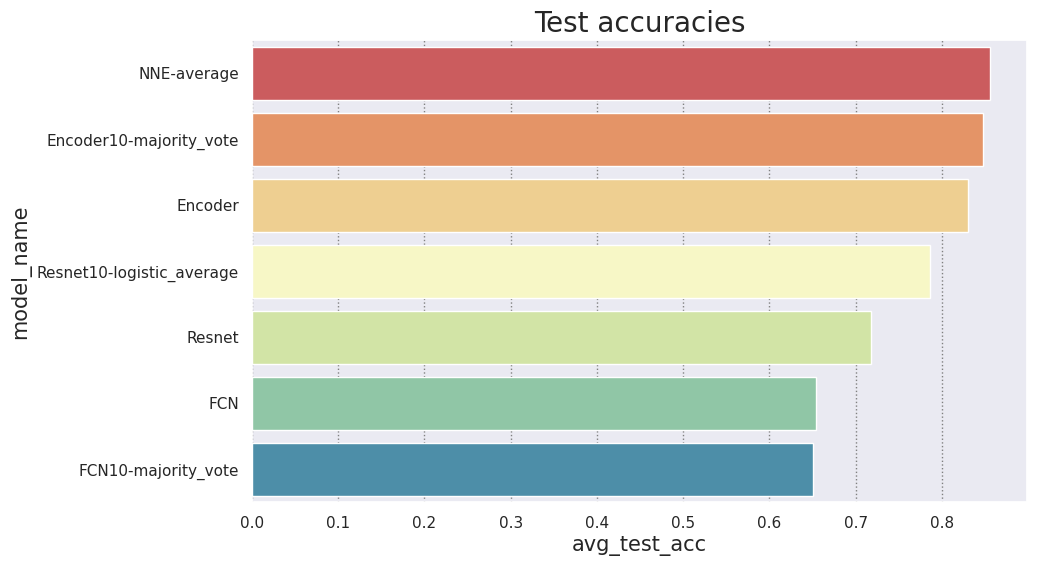

In [17]:
plot_accuracies_bar_plot(df_best_ensemble_and_individual_model)

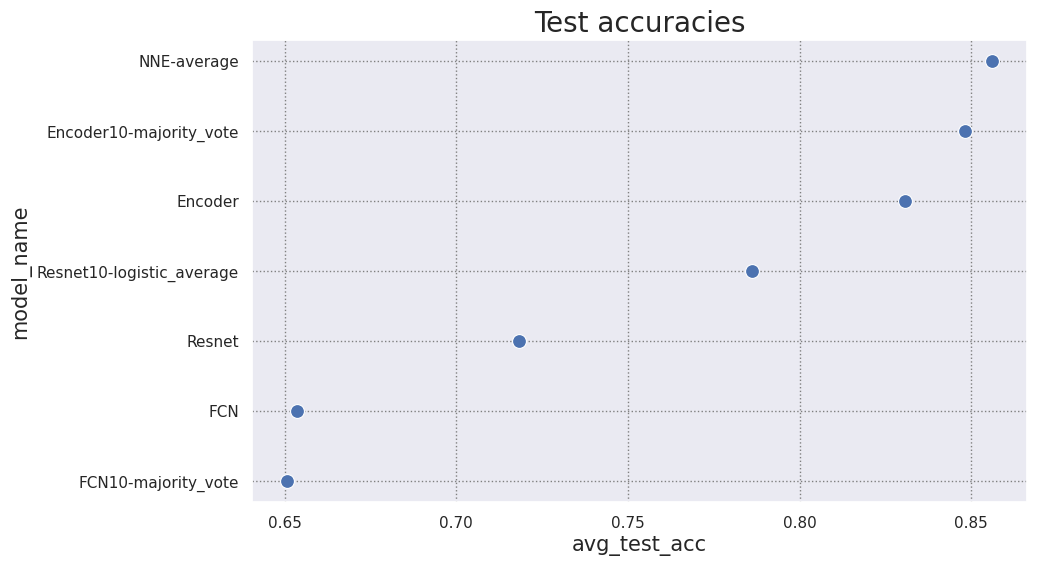

In [18]:
plot_accuracies_scatter_plot(df_best_ensemble_and_individual_model)

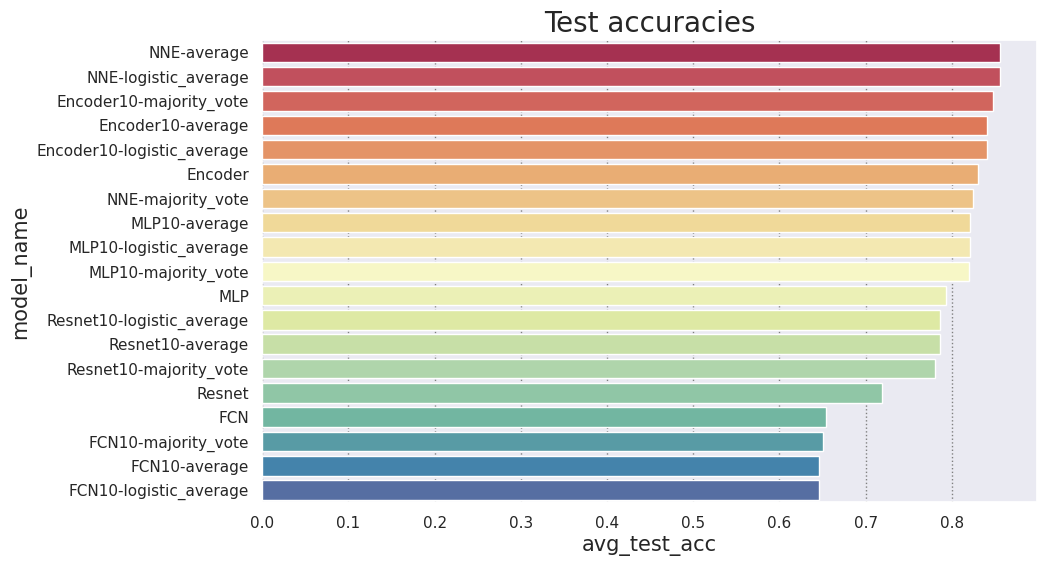

In [19]:
plot_accuracies_bar_plot(df_train_all_ensembles_mean)

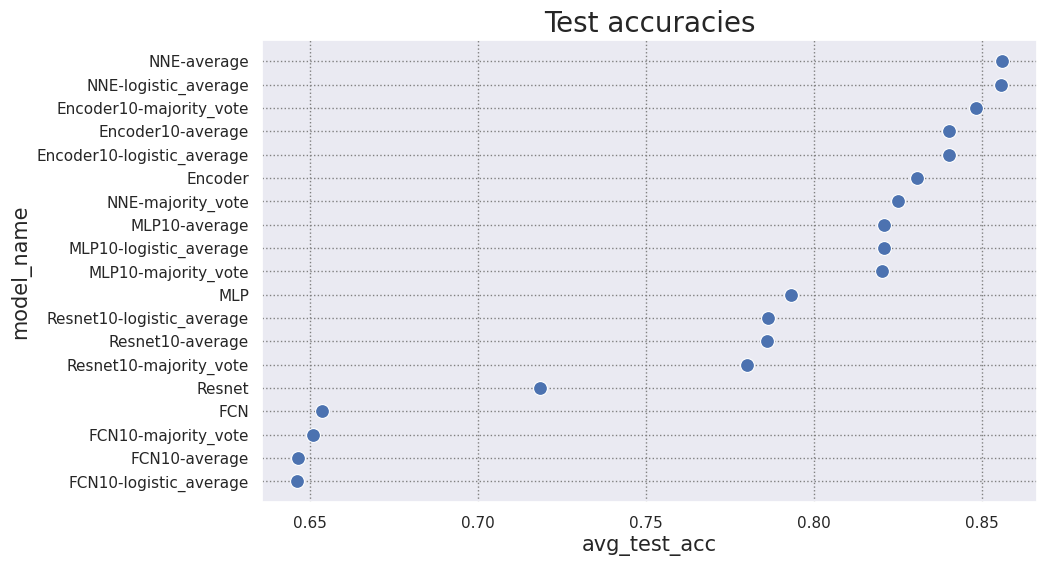

In [20]:
plot_accuracies_scatter_plot(df_train_all_ensembles_mean)

# Plot results for individual models

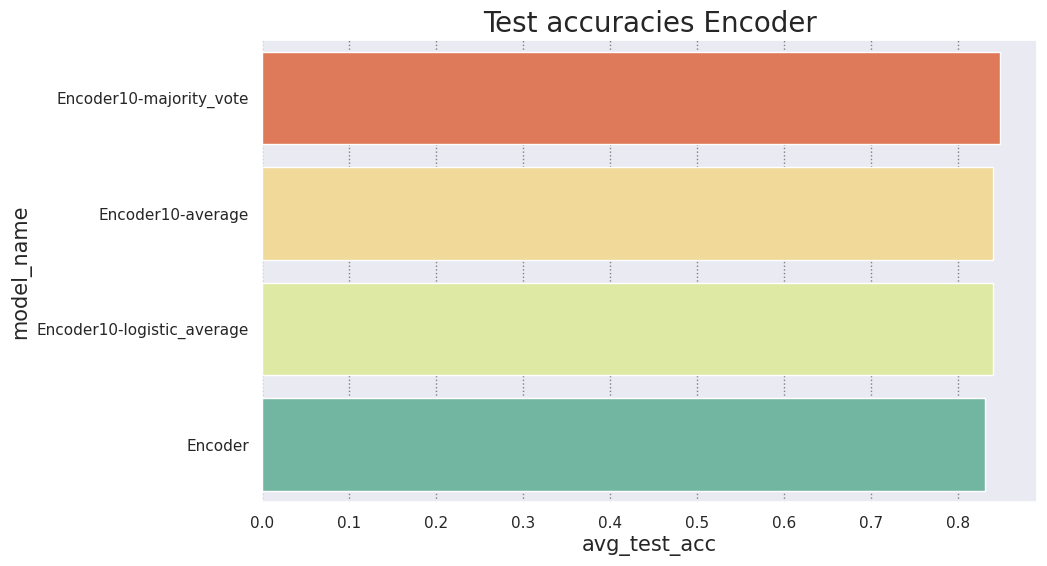

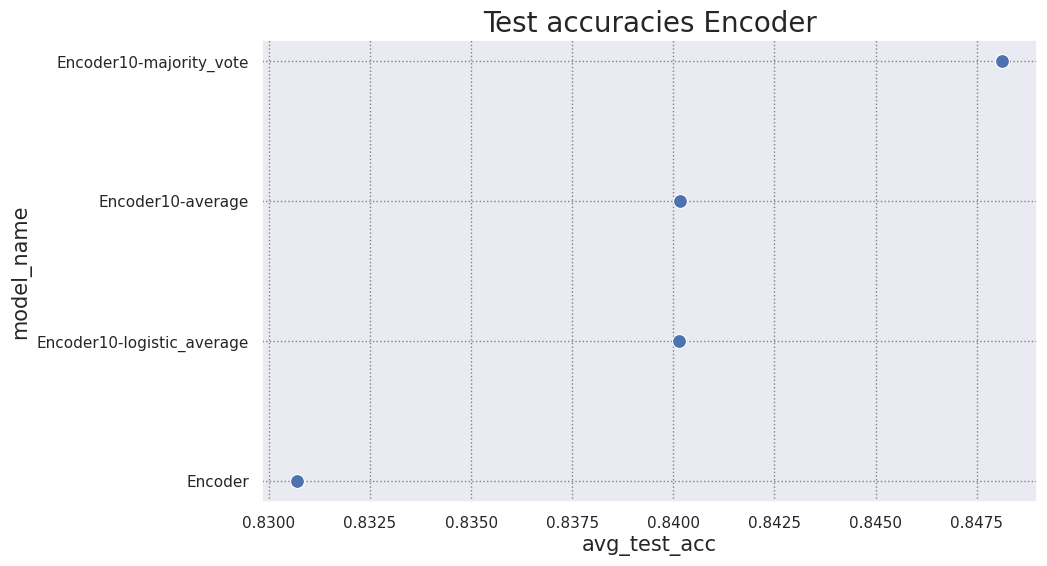

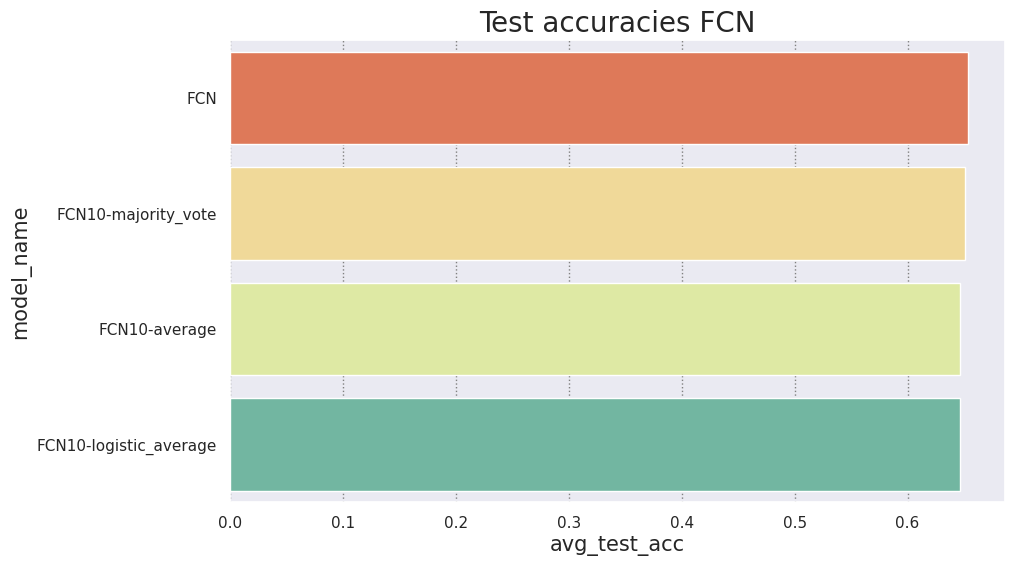

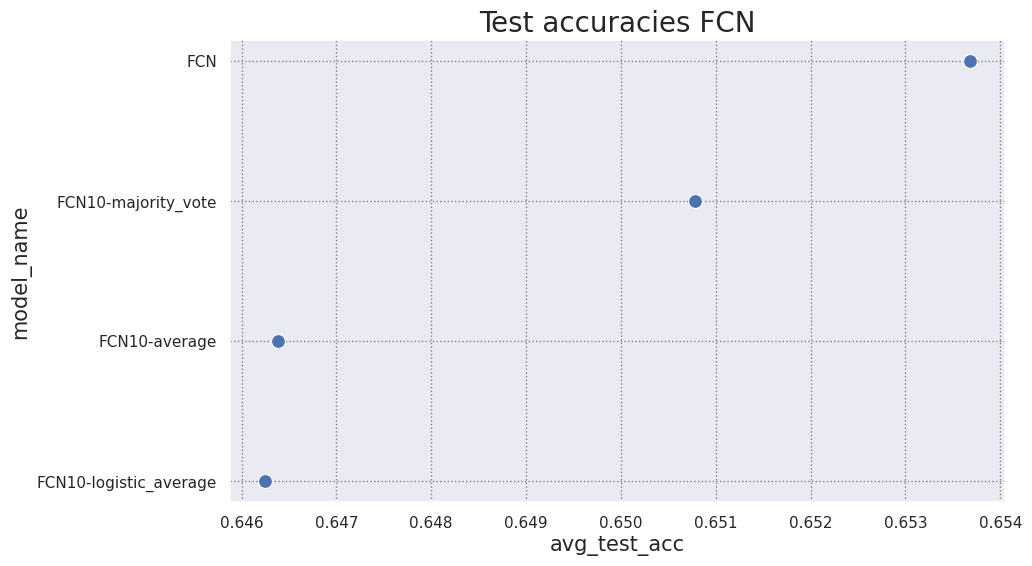

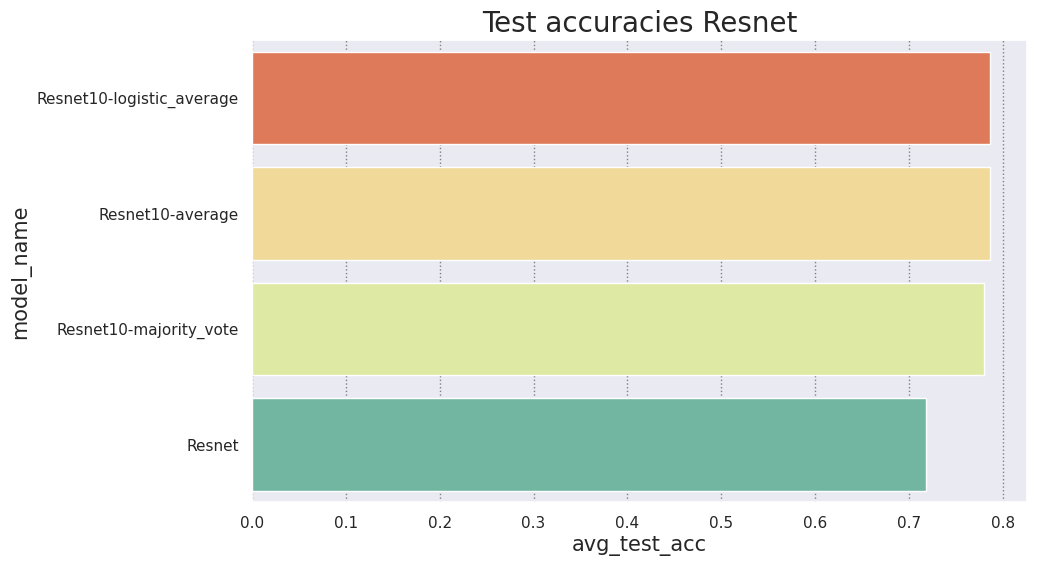

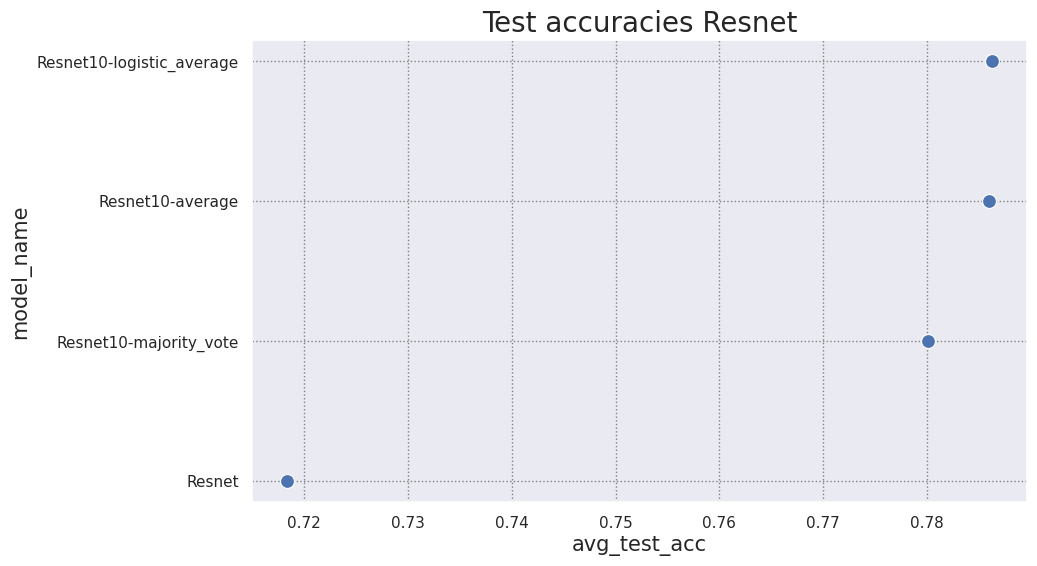

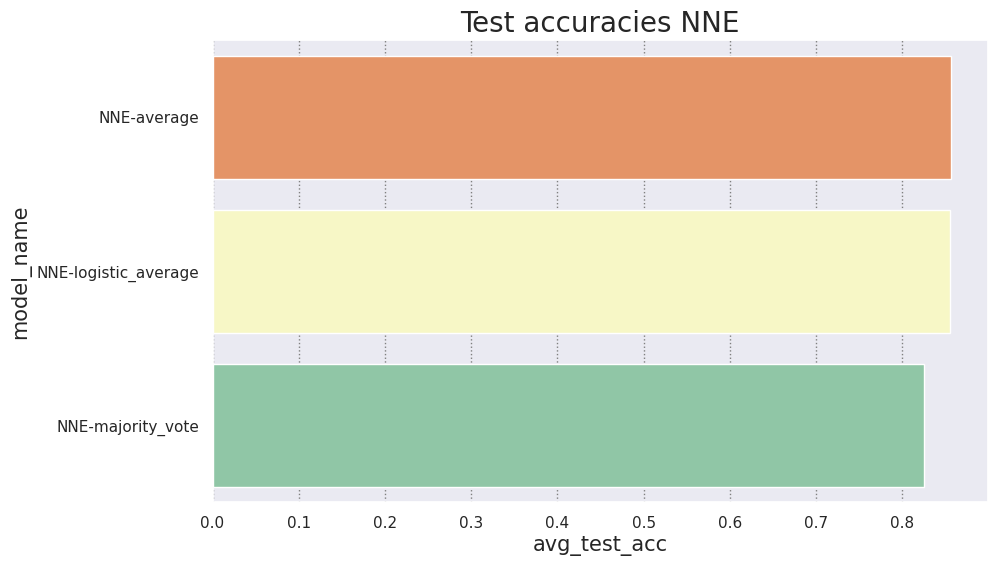

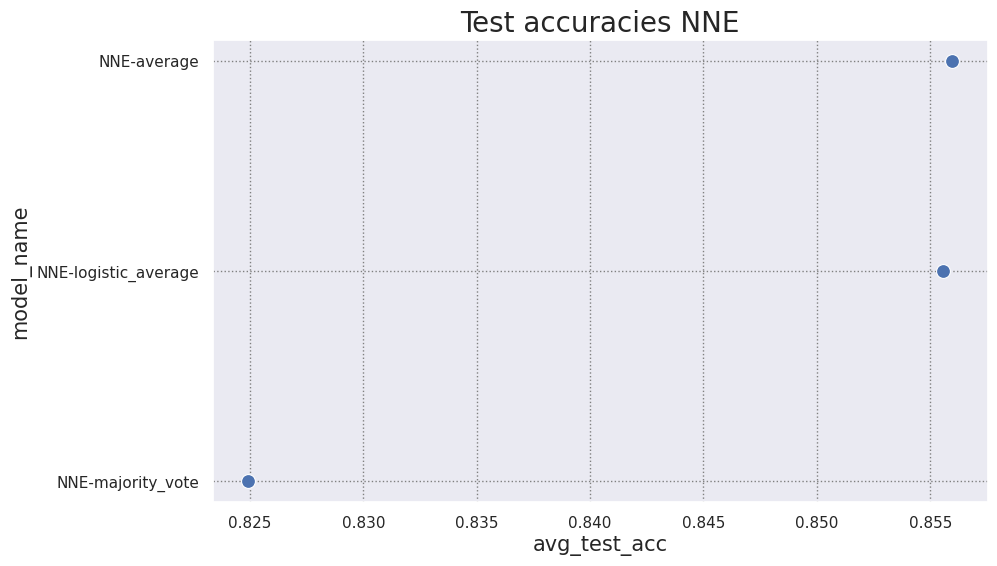

In [21]:
for df, title in zip([df_compare_encoder, df_compare_fcn, df_compare_resnet, df_compare_nne],\
                       ["Test accuracies Encoder", "Test accuracies FCN", "Test accuracies Resnet", "Test accuracies NNE"]):
    plot_accuracies_bar_plot(df, title=title)
    plot_accuracies_scatter_plot(df, title=title)